#종합실습2

## 0. 시작코드

In [1]:
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# 선형회귀분석 모델
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인: qqplot, add_constant
from statsmodels.api import qqplot, add_constant
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리: train/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가 함수
from sklearn.metrics import r2_score
# 선형 모델
from sklearn.linear_model import Ridge, Lasso, ElasticNet


# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

# 한글 폰트 설정 (맑은 고딕)
matplotlib.rc("font", family='Malgun Gothic')
matplotlib.rc("axes", unicode_minus=False)
matplotlib.rcParams["font.family"] = 'NanumGothic'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')


In [2]:
df_raw = pd.read_csv('./data/SCALE불량.csv',encoding = 'euc-kr')

In [3]:
df_raw.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조


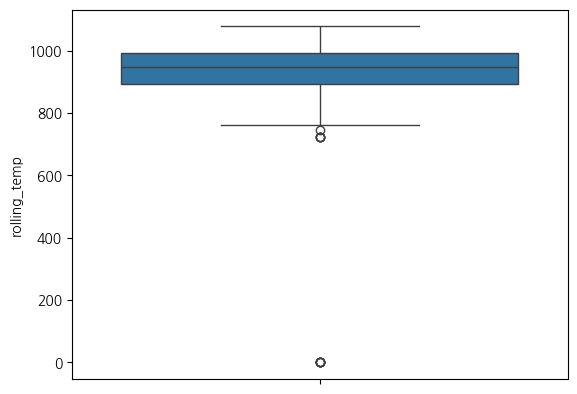

In [4]:
sns.boxplot(y='rolling_temp',data=df_raw)
plt.show()

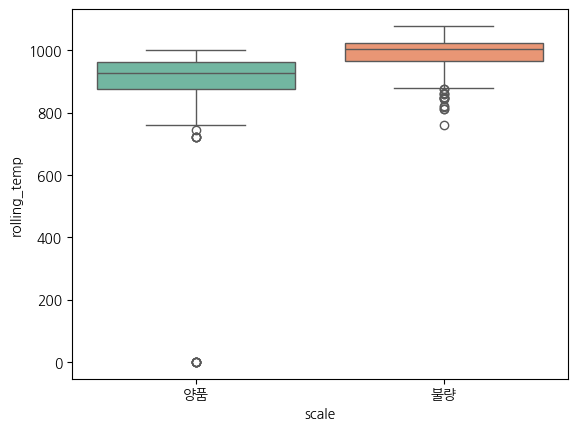

In [5]:
sns.boxplot(x='scale', y='rolling_temp', data=df_raw, palette='Set2')
plt.show()



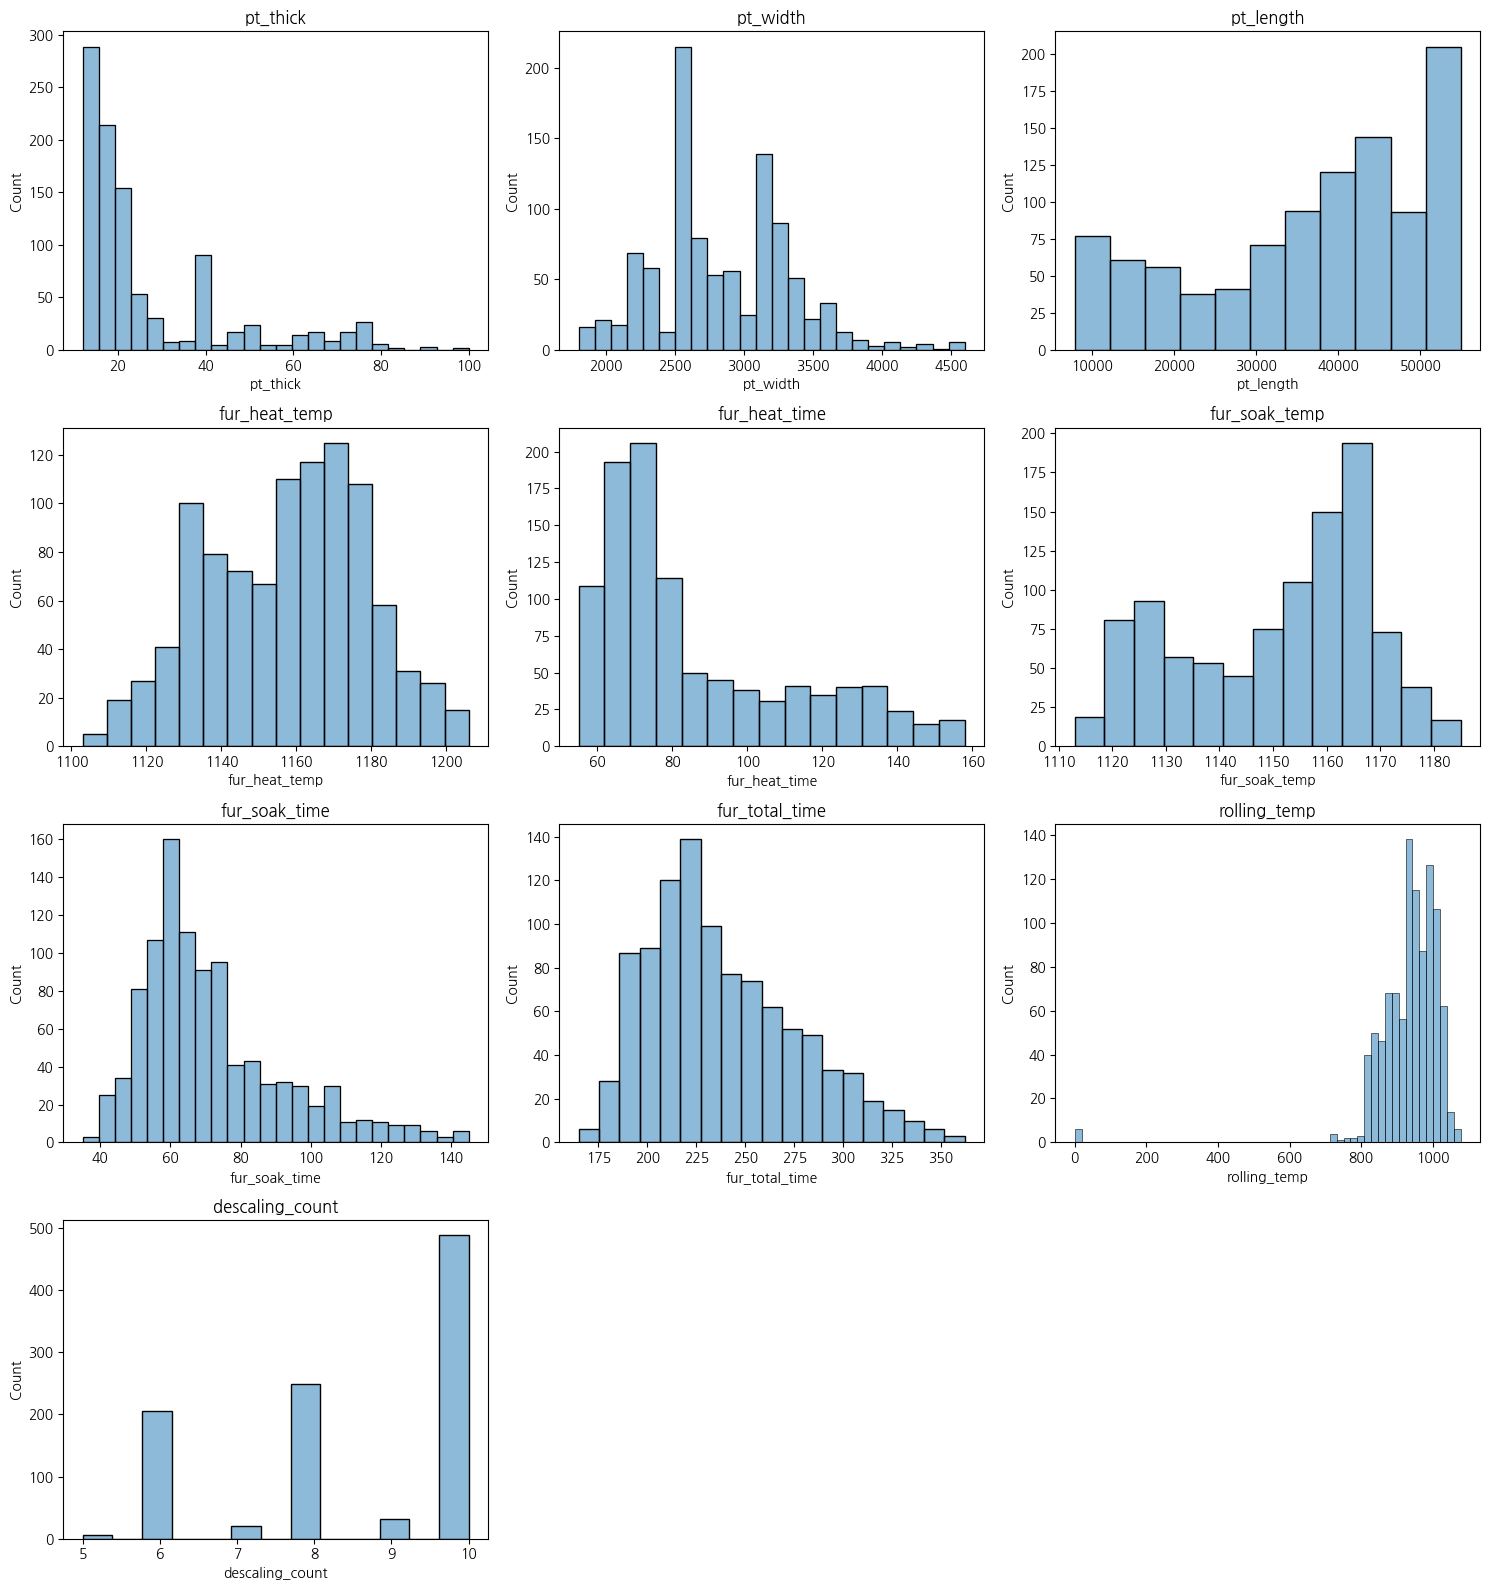

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 컬럼만 선택 (scale 제외)
numeric_cols = df_raw.select_dtypes(include='number').columns

# 서브플롯 설정
n_cols = 3  # 한 줄에 그릴 그래프 수
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for idx, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.histplot(data=df_raw, x=col, multiple='layer', alpha=0.5)
    plt.title(col)

plt.tight_layout()
plt.show()


In [7]:
df_raw

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,2열,1142,55,1151,86,203,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,2열,1142,55,1151,86,209,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,227,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,2열,1169,65,1163,77,204,CR(제어압연),948,10,4조


In [8]:
# scale 인코딩

# 문자열을 숫자로 변환: 양품 = 0, 불량 = 1
df_raw['scale'] = df_raw['scale'].map({'양품': 0, '불량': 1})


In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   int64 
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  rolling_method   1000 non-null   o

## 1. 이상치 + 결측치 처리

## 1-1. 이상치 처리를 위한 시각화(연속형)

In [10]:
sns.boxplot(x='scale', y='pt_thick', data=df_raw)

<Axes: xlabel='scale', ylabel='pt_thick'>

In [11]:
sns.boxplot(x='scale', y='pt_width', data=df_raw)

<Axes: xlabel='scale', ylabel='pt_thick'>

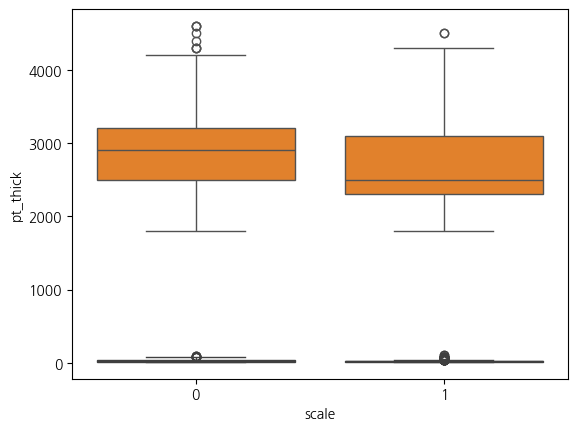

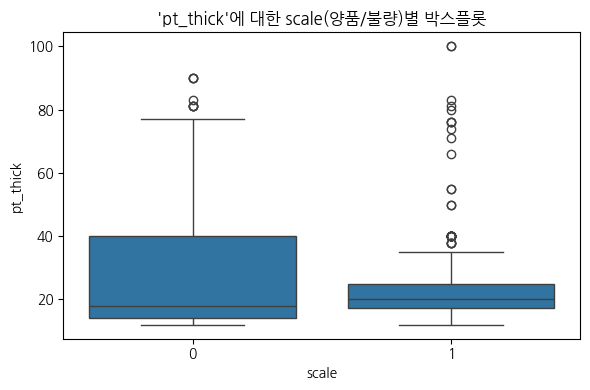

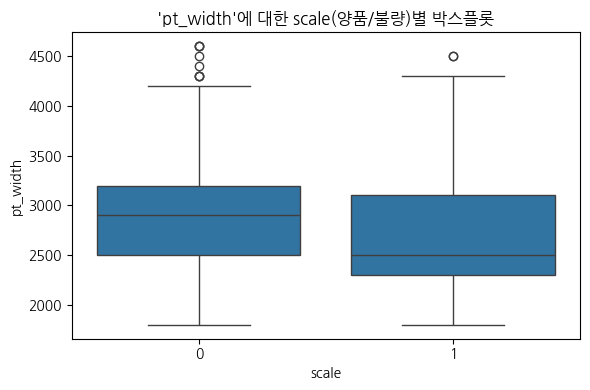

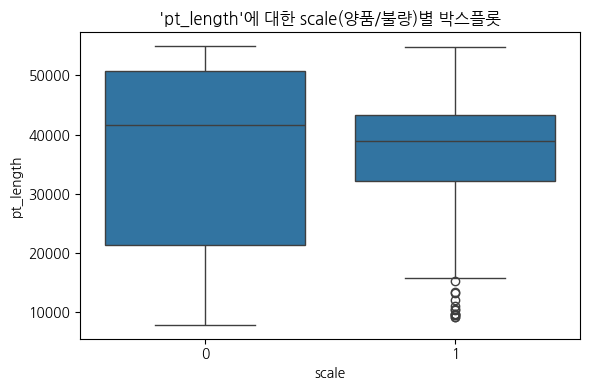

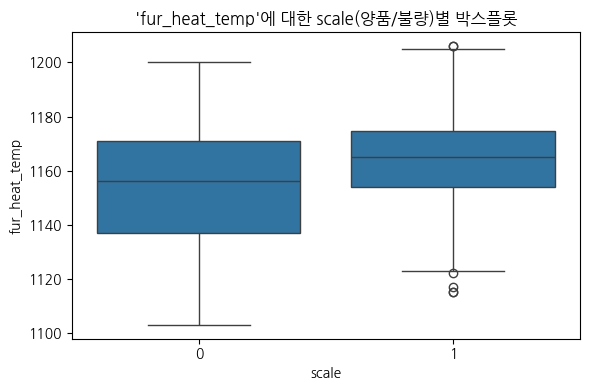

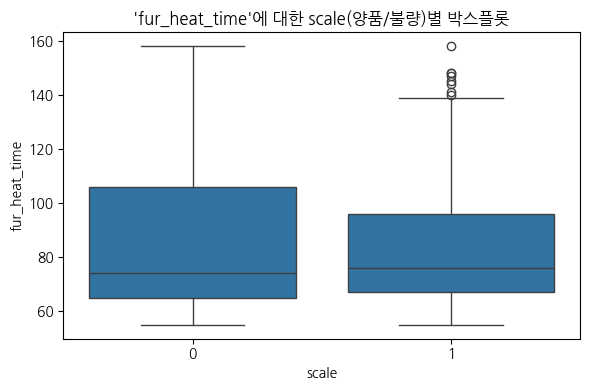

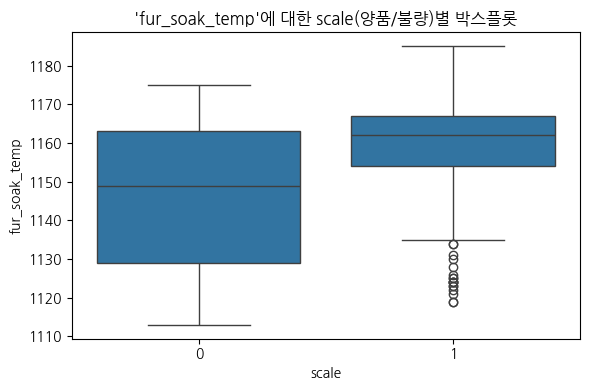

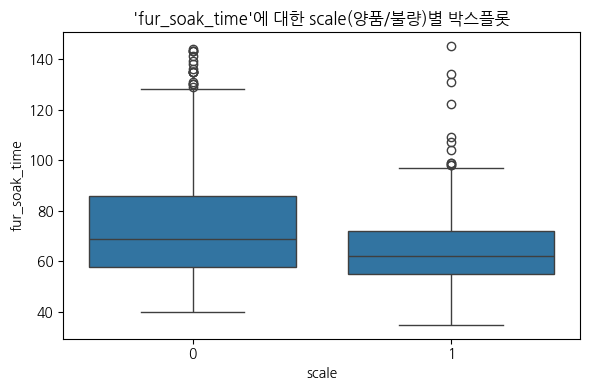

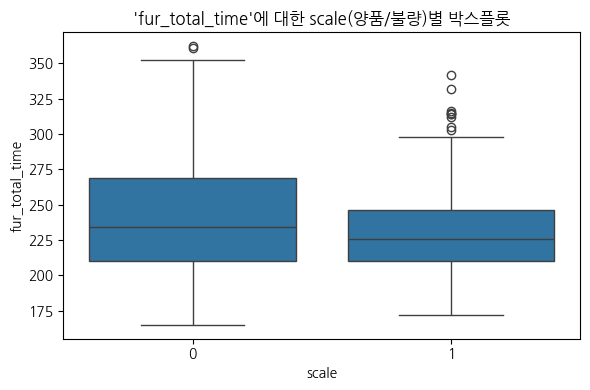

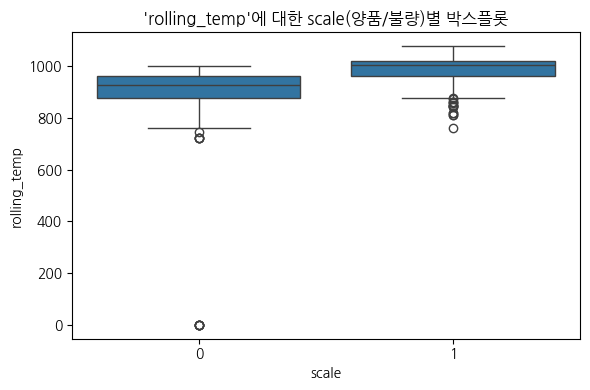

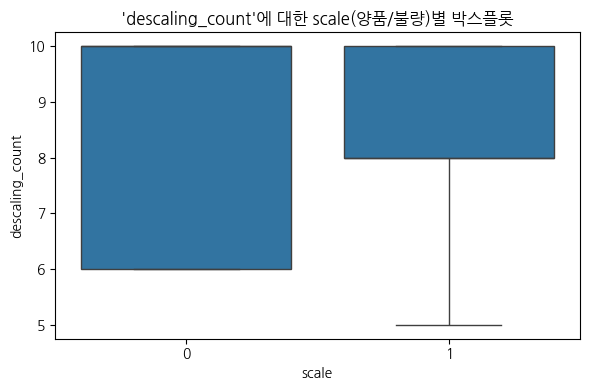

In [12]:
# scale을 문자열로 명확히 처리
df_raw['scale'] = df_raw['scale'].astype(str)

# 숫자형 컬럼만 골라내기 (pt_thick처럼 수치형 변수만 시각화 대상)
numeric_cols = df_raw.select_dtypes(include=['int64', 'float64']).columns

# 반복문으로 각 수치형 변수별 boxplot 생성
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='scale', y=col, data=df_raw)
    plt.title(f"'{col}'에 대한 scale(양품/불량)별 박스플롯")
    plt.xlabel('scale')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

### 롤링템퍼 0인애들 6개 이상치 제거

In [13]:
# rolling_temp가 0인 행 제거
df_raw = df_raw[df_raw['rolling_temp'] != 0].copy()


In [14]:
df_raw[df_raw["rolling_temp"] == 0]

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group


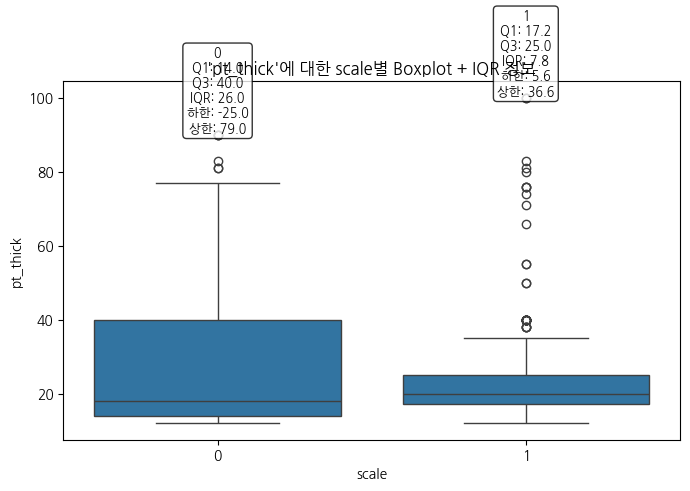

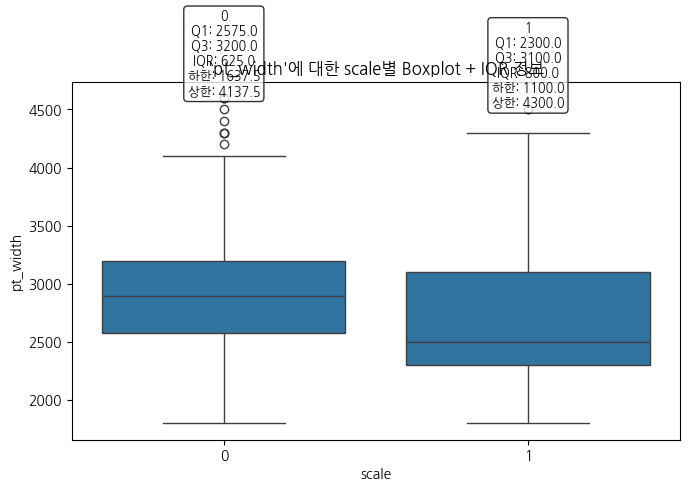

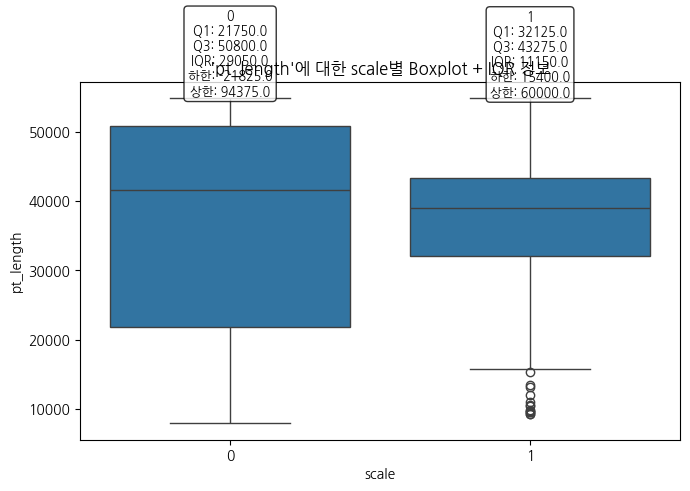

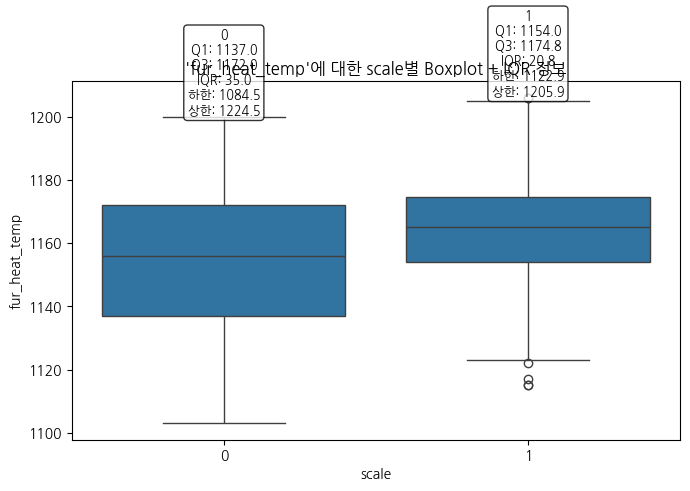

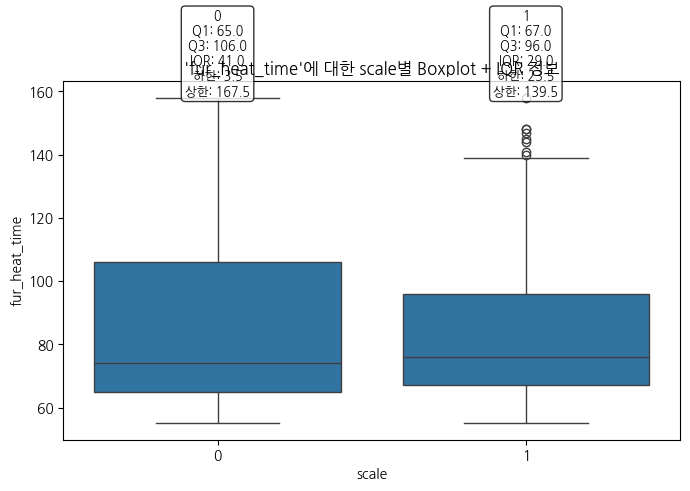

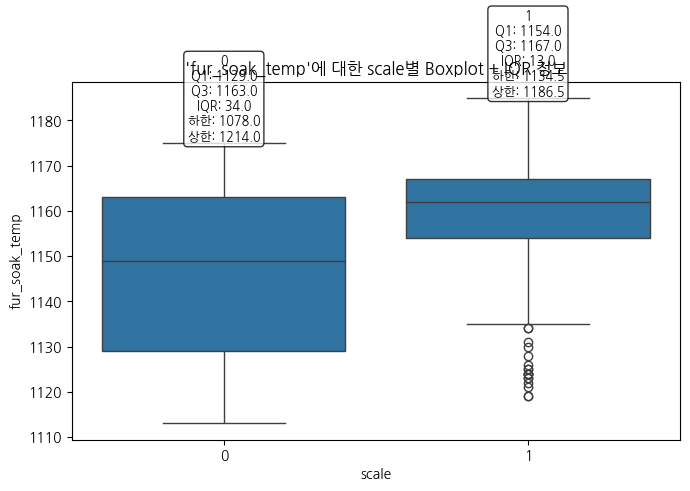

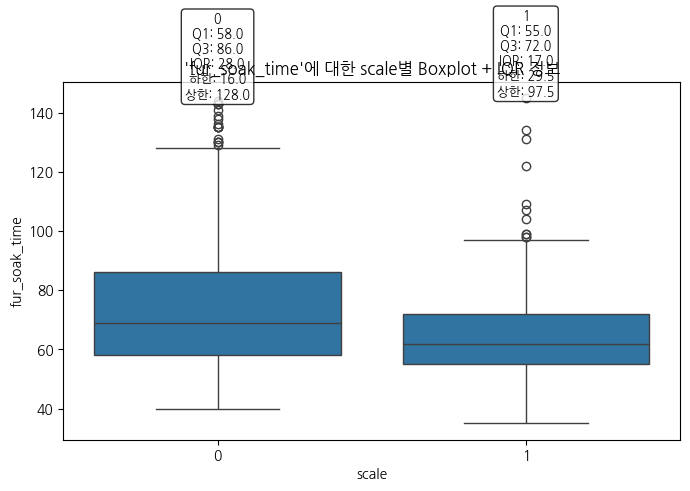

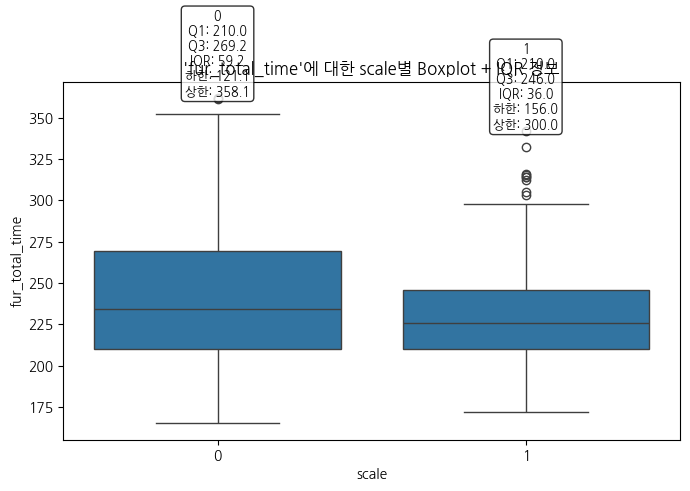

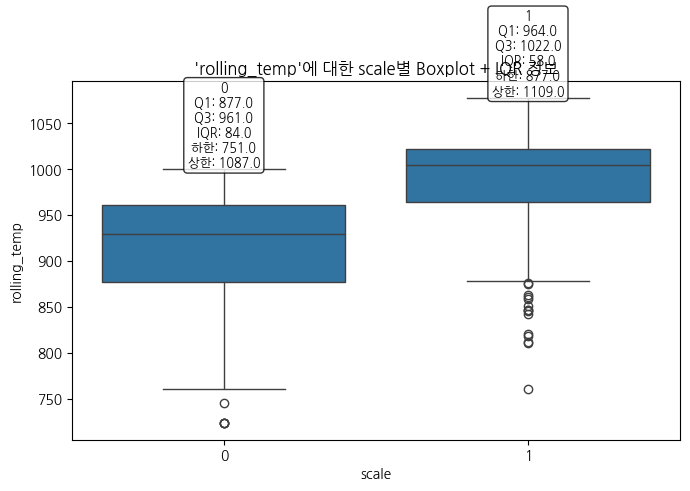

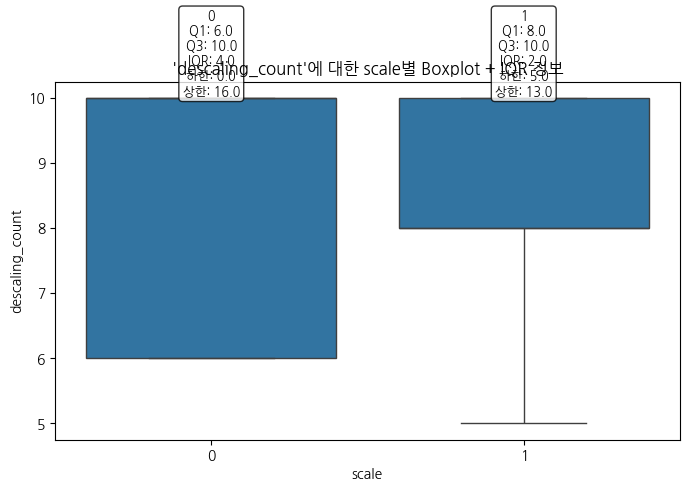

In [15]:
# scale을 문자열로 처리
df_raw['scale'] = df_raw['scale'].astype(str)

# 수치형 변수 추출
numeric_cols = df_raw.select_dtypes(include=['int64', 'float64']).columns
category_values = df_raw['scale'].unique()

# 반복문
for col in numeric_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.boxplot(x='scale', y=col, data=df_raw)
    plt.title(f"'{col}'에 대한 scale별 Boxplot + IQR 정보")
    plt.xlabel('scale')
    plt.ylabel(col)

    for i, category in enumerate(category_values):
        group = df_raw[df_raw['scale'] == category][col]
        Q1 = group.quantile(0.25)
        Q3 = group.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        text = f"{category}\nQ1: {Q1:.1f}\nQ3: {Q3:.1f}\nIQR: {IQR:.1f}\n하한: {lower:.1f}\n상한: {upper:.1f}"

        ax.text(x=i, y=group.max(), s=text,
                ha='center', va='bottom', fontsize=9,
                bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

    plt.tight_layout()
    plt.show()


## 1-2. 이상치? 처리를 위한 데이터 확인(범주형)

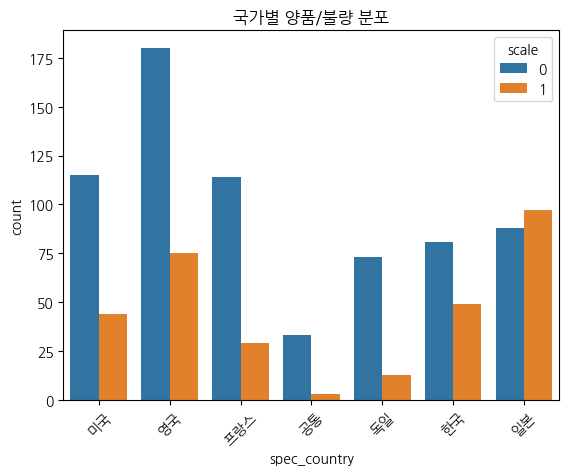

In [16]:
sns.countplot(data=df_raw, x='spec_country', hue='scale')
plt.title('국가별 양품/불량 분포')
plt.xticks(rotation=45)
plt.show()

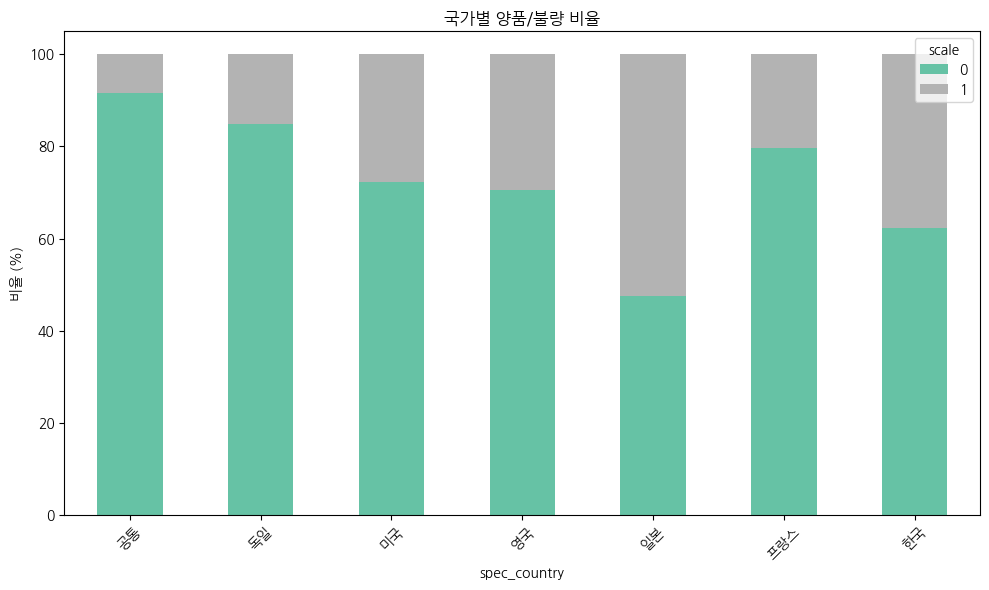

In [17]:
pd.crosstab(df_raw['spec_country'], df_raw['scale'], normalize='index') * 100

ct = pd.crosstab(df_raw['spec_country'], df_raw['scale'], normalize='index') * 100

# 누적 막대그래프 그리기
ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.ylabel('비율 (%)')
plt.title('국가별 양품/불량 비율')
plt.legend(title='scale', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:


# scale을 문자열로 명확히 설정
df_raw['scale'] = df_raw['scale'].astype(str)

# 범주형 컬럼 추출 (object 또는 category 타입)
categorical_cols = df_raw.select_dtypes(include=['object', 'category']).columns.tolist()

# 목표변수 제외 (scale은 target이므로)
categorical_cols = [col for col in categorical_cols if col != 'scale']

# 반복문으로 countplot + stacked bar plot 그리기
for col in categorical_cols:
    print(f"📊 [{col}] vs [scale] 시각화 중...")

    # COUNT PLOT
    
    # plt.figure(figsize=(8, 4))
    # sns.countplot(data=df_raw, x=col, hue='scale')
    # plt.title(f'Countplot - {col} vs scale')
    # plt.xticks(rotation=45)
    # plt.tight_layout()
    # plt.show()

    # STACKED BAR PLOT

    # ctab = pd.crosstab(df_raw[col], df_raw['scale'], normalize='index') * 100
    # ctab.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='Set2')
    # plt.title(f'Stacked Barplot - {col} vs scale (%)')
    # plt.ylabel('비율 (%)')
    # plt.xticks(rotation=45)
    # plt.legend(title='scale')
    # plt.tight_layout()
    # plt.show()


📊 [plate_no] vs [scale] 시각화 중...
📊 [rolling_date] vs [scale] 시각화 중...
📊 [spec_long] vs [scale] 시각화 중...
📊 [spec_country] vs [scale] 시각화 중...
📊 [steel_kind] vs [scale] 시각화 중...
📊 [hsb] vs [scale] 시각화 중...
📊 [fur_no] vs [scale] 시각화 중...
📊 [fur_input_row] vs [scale] 시각화 중...
📊 [rolling_method] vs [scale] 시각화 중...
📊 [work_group] vs [scale] 시각화 중...


## 1-3 scale 인코딩

In [19]:
# scale(양품/불량) 원핫 인코딩(drop_first)
df_raw_dummy = pd.get_dummies(df_raw, columns=['scale'], drop_first=True)

In [20]:
df_raw_dummy.head()

,plate_no,rolling_date,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,scale_1
0,PLT_1001,03JAN2023:07:07:53,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,1144,116,1133,59,259,TMCP(온도제어),934,8,1조,False
1,PLT_1002,03JAN2023:07:21:22,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,1144,122,1135,53,238,TMCP(온도제어),937,8,1조,False
2,PLT_1003,03JAN2023:07:31:15,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,1129,116,1121,55,258,TMCP(온도제어),889,8,1조,False
3,PLT_1004,03JAN2023:07:41:01,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,1152,125,1127,68,266,TMCP(온도제어),885,8,1조,False
4,PLT_1005,03JAN2023:07:52:40,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,...,1140,134,1128,48,246,TMCP(온도제어),873,8,1조,False


# 2. 파생변수 생성, 상관관계 검정

In [21]:
# df_grouped = df_raw.groupby('hsb')['scale'].mean().reset_index()
# df_grouped.columns = ['hsb', '불량률']

In [22]:
# sns.barplot(x='hsb', y='불량률', data=df_grouped, palette='Blues')
# plt.title('HSB 적용 여부에 따른 불량률')
# plt.ylabel('불량률 (scale=1 비율)')
# plt.xlabel('HSB 적용 여부')
# plt.ylim(0, 1)  # 비율이니까 0~1로 고정
# plt.grid(axis='y', linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()

## 2-1. rolling date 날짜 분리?

In [23]:
# 1.날짜형으로 바꾸는 코드

df_raw["rolling_date"] = df_raw["rolling_date"].astype(str).str.strip().str.upper()

df_raw["rolling_date"] = pd.to_datetime(df_raw["rolling_date"], format="%d%b%Y:%H:%M:%S", errors="coerce")

df_raw["day"] = df_raw["rolling_date"].dt.day           # 날짜만 추출
df_raw["hour"] = df_raw["rolling_date"].dt.hour           # 시(hour)
df_raw["minute"] = df_raw["rolling_date"].dt.minute       # 분(minute)
df_raw["weekday"] = df_raw["rolling_date"].dt.day_name()  # 요일 이름

# 요일을 숫자형으로 변환 (월요일=0, 화요일=1, ..., 일요일=6)

df_raw["weekday_number"] = df_raw["rolling_date"].dt.weekday

# 결과 확인

df_raw.head()



,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,day,hour,minute,weekday,weekday_number
0,PLT_1001,2023-01-03 07:07:53,0,AB/EH32-TM,미국,T,32,3700,15100,적용,...,259,TMCP(온도제어),934,8,1조,3,7,7,Tuesday,1
1,PLT_1002,2023-01-03 07:21:22,0,AB/EH32-TM,미국,T,32,3700,15100,적용,...,238,TMCP(온도제어),937,8,1조,3,7,21,Tuesday,1
2,PLT_1003,2023-01-03 07:31:15,0,NV-E36-TM,영국,T,33,3600,19200,적용,...,258,TMCP(온도제어),889,8,1조,3,7,31,Tuesday,1
3,PLT_1004,2023-01-03 07:41:01,0,NV-E36-TM,영국,T,33,3600,19200,적용,...,266,TMCP(온도제어),885,8,1조,3,7,41,Tuesday,1
4,PLT_1005,2023-01-03 07:52:40,0,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,246,TMCP(온도제어),873,8,1조,3,7,52,Tuesday,1


In [24]:
# weekday 컬럼(요일) 제거

df_raw.drop('weekday', axis= 1,inplace=True)

In [25]:
# rolling_date 컬럼 제거

df_raw.drop('rolling_date', axis= 1,inplace=True)

In [26]:
df_raw.head()

,plate_no,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,day,hour,minute,weekday_number
0,PLT_1001,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,59,259,TMCP(온도제어),934,8,1조,3,7,7,1
1,PLT_1002,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,53,238,TMCP(온도제어),937,8,1조,3,7,21,1
2,PLT_1003,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,55,258,TMCP(온도제어),889,8,1조,3,7,31,1
3,PLT_1004,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,68,266,TMCP(온도제어),885,8,1조,3,7,41,1
4,PLT_1005,0,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,...,48,246,TMCP(온도제어),873,8,1조,3,7,52,1


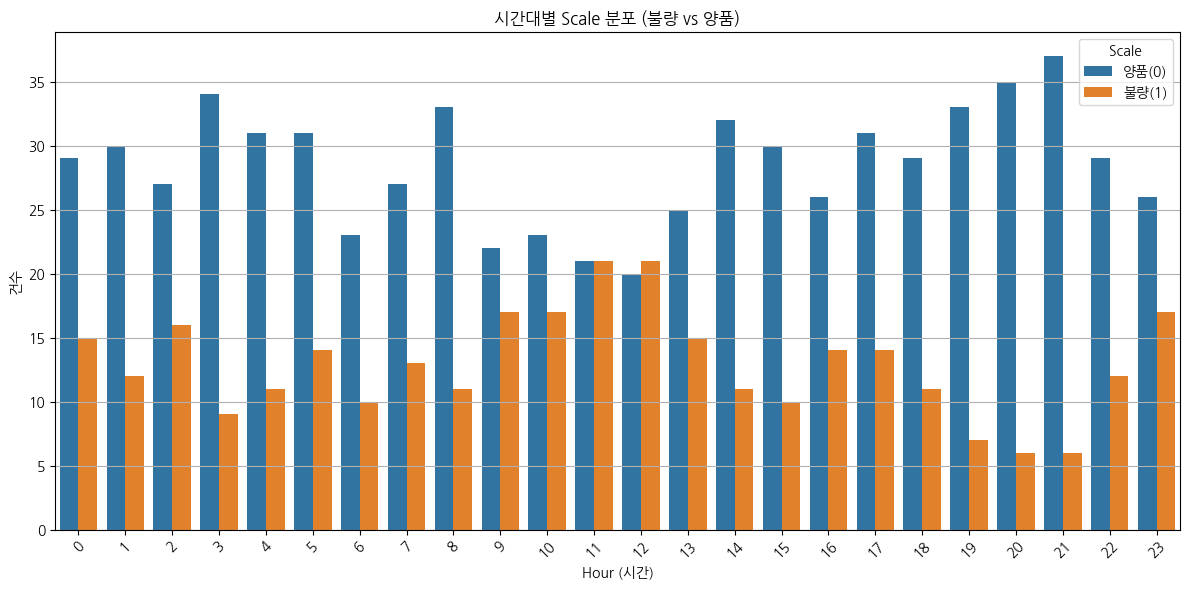

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='hour', hue='scale', data=df_raw)

plt.title("시간대별 Scale 분포 (불량 vs 양품)")
plt.xlabel("Hour (시간)")
plt.ylabel("건수")
plt.legend(title='Scale', labels=['양품(0)', '불량(1)'])
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


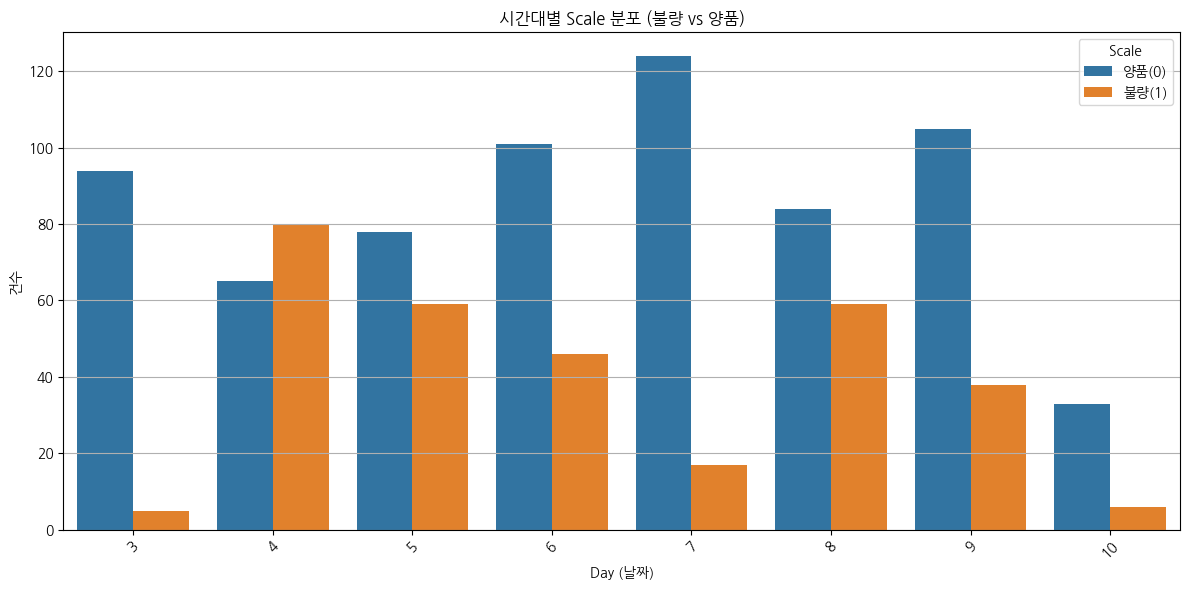

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='day', hue='scale', data=df_raw)

plt.title("시간대별 Scale 분포 (불량 vs 양품)")
plt.xlabel("Day (날짜)")
plt.ylabel("건수")
plt.legend(title='Scale', labels=['양품(0)', '불량(1)'])
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
df_raw['spec_long'].unique()

array(['AB/EH32-TM', 'NV-E36-TM', 'BV-EH36-TM', 'AB/EH36-TM', 'COMMON',
       'BV-AH32-TM', 'GL-E32-TM', 'GL-E36-TM', 'BV-EH32-TM', 'KS-HSB600',
       'LR-EH36-TM', 'BV-B', 'AB/B', 'LR-B', 'JS-SM490YB', 'KR-B', 'LR-A',
       'JS-SM490A', 'KS-SM400B', 'JS-SM400B', 'KS-SS400', 'KR-A',
       'JS-SS400', 'NV-A', 'KS-SM400A', 'KS-SM490B', 'V42JBN3', 'AB/A',
       'A516-60', 'BV-AH32', 'JS-SM490YA', 'AB/AH32', 'GL-A32', 'LR-AH32',
       'CCS-B', 'NV-B', 'NV-A32', 'KS-SM490A', 'GL-A', 'NK-KA32',
       'LR-AH36', 'A709-36', 'KR-AH32', 'BV-A', 'NK-KA', 'NV-D36-TM',
       'NK-KA32-TM', 'GL-A32-TM', 'LR-AH36-TM', 'LR-EH32-TM', 'NV-E32-TM',
       'KS-HSB500', 'API-2W-50T', 'GL-A36-TM', 'NV-A32-TM', 'NV-D32-TM',
       'NK-KD36-TM', 'GL-D36-TM', 'PILAC-BT33', 'NV-A36-TM', 'BV-AH36-TM',
       'A131-DH36TM', 'BV-AH36-TL', 'SA283-C', 'A283-C', 'JS-SM400A'],
      dtype=object)

## 2-2. Spec_long에서 앞에 두 글자만 따서 파생변수 생성( 선급사 코드 등)

In [28]:
# ❶ 후판 spec 기준 고강도, 조선용, 열처리 여부 등을 반영해 파생변수 생성

# 주요 키워드 정의
high_strength_keywords = ['EH36', 'AH36', 'DH36', 'HSB', 'SM490', 'A516', 'A709']
shipbuilding_keywords = ['EH', 'AH', 'DH', 'CCS', 'LR', 'NK', 'GL', 'AB', 'BV', 'KR']
heat_treatment_keywords = ['TM', 'TL']  # TM: Thermo-Mechanical, TL: Toughness Level

# ❷ spec_long → 문자열로 변환
df_raw['spec_long'] = df_raw['spec_long'].astype(str)

# ❸ 고강도 재질 여부
df_raw['is_high_strength'] = df_raw['spec_long'].apply(
    lambda x: any(kw in x for kw in high_strength_keywords)
)

# ❹ 조선용 재질 여부
df_raw['is_ship_steel'] = df_raw['spec_long'].apply(
    lambda x: any(kw in x for kw in shipbuilding_keywords)
)

# ❺ 열처리 방식 (TM / TL / 없음) → 다중 클래스
def extract_heat_treatment(x):
    for ht in heat_treatment_keywords:
        if ht in x:
            return ht
    return 'None'

df_raw['heat_treatment_type'] = df_raw['spec_long'].apply(extract_heat_treatment)

# ❻ 강종 코드만 추출 (예: SM490, EH36 등)
import re
df_raw['spec_grade'] = df_raw['spec_long'].apply(
    lambda x: re.findall(r'[A-Z]{2,4}\-?\d{2,3}', x)[-1] if re.findall(r'[A-Z]{2,4}\-?\d{2,3}', x) else 'UNKNOWN'
)


### ***scale, steel_kind, hsb 등 범주형 변수는 시각화 전에 0:1로 매핑하기

In [29]:
df_raw.head() # 기존의 spec_long은 일단 드랍하지 않고 유지하는 걸로 ... (전문가들에게는 그 자체가 더 직관적일 수 있음, 추후 마생변수 생성 가능성)

,plate_no,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,descaling_count,work_group,day,hour,minute,weekday_number,is_high_strength,is_ship_steel,heat_treatment_type,spec_grade
0,PLT_1001,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,8,1조,3,7,7,1,False,True,TM,EH32
1,PLT_1002,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,8,1조,3,7,21,1,False,True,TM,EH32
2,PLT_1003,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,8,1조,3,7,31,1,False,False,TM,UNKNOWN
3,PLT_1004,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,8,1조,3,7,41,1,False,False,TM,UNKNOWN
4,PLT_1005,0,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,...,8,1조,3,7,52,1,True,True,TM,EH36


In [30]:
df_raw.columns

Index(['plate_no', 'scale', 'spec_long', 'spec_country', 'steel_kind',
       'pt_thick', 'pt_width', 'pt_length', 'hsb', 'fur_no', 'fur_input_row',
       'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp', 'fur_soak_time',
       'fur_total_time', 'rolling_method', 'rolling_temp', 'descaling_count',
       'work_group', 'day', 'hour', 'minute', 'weekday_number',
       'is_high_strength', 'is_ship_steel', 'heat_treatment_type',
       'spec_grade'],
      dtype='object')

### 📊 시각화: 목표 그래프 형태
x축: 그룹 이름 (heat_temp_high, soak_temp_high, both_high)

y축: 불량률 (0~1)

각 막대: 1150도 이상일 때의 그룹 vs 미만 그룹 → 비교용

### 2-3. 목표변수 영향 변수 확인

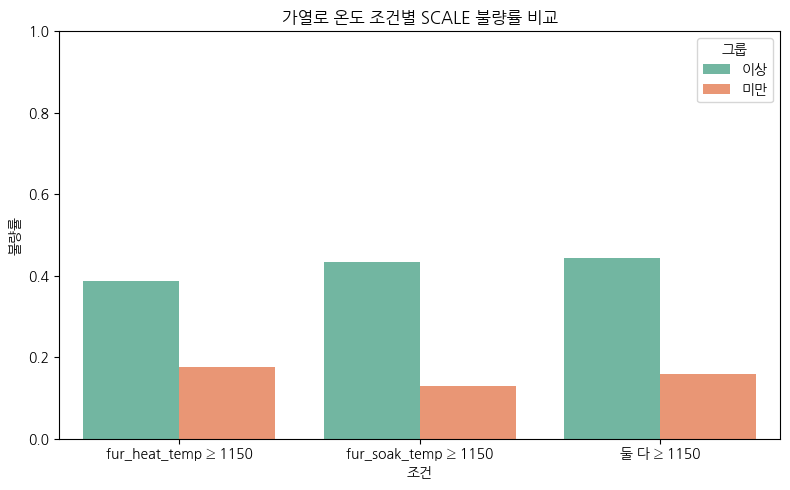

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 전제: scale은 0/1 값이어야 함

# 조건별 그룹 생성
df_raw['scale'] = df_raw['scale'].astype(int)

df_raw['heat_temp_high'] = df_raw['fur_heat_temp'] >= 1150
df_raw['soak_temp_high'] = df_raw['fur_soak_temp'] >= 1150
df_raw['both_temp_high'] = (df_raw['fur_heat_temp'] >= 1150) & (df_raw['fur_soak_temp'] >= 1150)

# 그룹별 불량률 계산
summary = pd.DataFrame({
    '조건': ['fur_heat_temp ≥ 1150', 'fur_soak_temp ≥ 1150', '둘 다 ≥ 1150'],
    '이상': [
        df_raw[df_raw['heat_temp_high']]['scale'].mean(),
        df_raw[df_raw['soak_temp_high']]['scale'].mean(),
        df_raw[df_raw['both_temp_high']]['scale'].mean()
    ],
    '미만': [
        df_raw[~df_raw['heat_temp_high']]['scale'].mean(),
        df_raw[~df_raw['soak_temp_high']]['scale'].mean(),
        df_raw[~df_raw['both_temp_high']]['scale'].mean()
    ]
})

# melt로 변형하여 시각화
summary_melted = summary.melt(id_vars='조건', var_name='그룹', value_name='불량률')

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x='조건', y='불량률', hue='그룹', data=summary_melted, palette='Set2')
plt.title("가열로 온도 조건별 SCALE 불량률 비교")
plt.ylabel("불량률")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


### 파생변수: 디스케일링 홀짝여부, 롤링템퍼 1000 이상이면 불량, 

In [32]:
# descaling_count 홀/짝수 구분 → 'odd' 또는 'even'
df_raw['descaling_parity'] = df_raw['descaling_count'].apply(
    lambda x: 'odd' if x % 2 == 1 else 'even')
### 홀수이면 불량률이 높은가? 와 같은 가설은 카이제곱 검정

### rolling_temp를 1000 기준으로 'high' / 'low' , 불량률 시각화

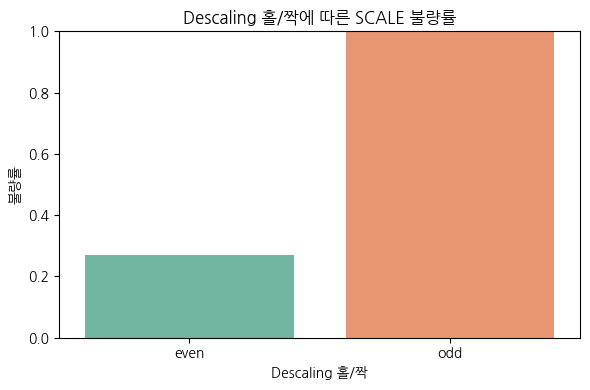

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# 불량률 계산: 홀짝 기준
summary = df_raw.groupby('descaling_parity')['scale'].mean().reset_index()

# 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x='descaling_parity', y='scale', data=summary, palette='Set2')
plt.title('Descaling 홀/짝에 따른 SCALE 불량률')
plt.xlabel('Descaling 홀/짝')
plt.ylabel('불량률')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [34]:
# rolling_temp를 1000 기준으로 'high' / 'low' 범주 생성
df_raw['rolling_temp_1000'] = df_raw['rolling_temp'].apply(
    lambda x: 'high' if x >= 1000 else 'low'
)


### rolling_temp를 1000 기준으로 'high' / 'low' , 불량률 시각화

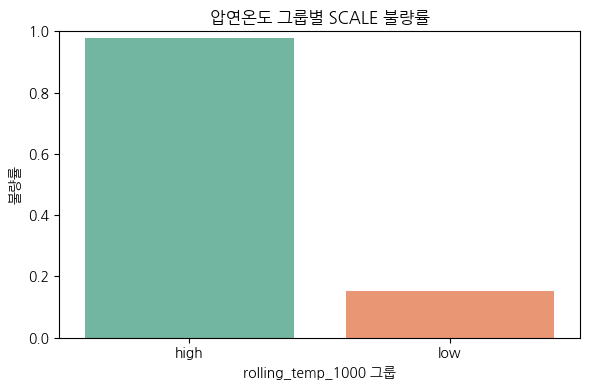

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# rolling_temp_1000 값이 'low', 'middle' 등의 범주라고 가정
# scale은 0=양품, 1=불량 이진값으로 존재해야 함

# 범주별 불량률 계산
summary = df_raw.groupby('rolling_temp_1000')['scale'].mean().reset_index()

# 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x='rolling_temp_1000', y='scale', data=summary, palette='Set2')
plt.title("압연온도 그룹별 SCALE 불량률")
plt.xlabel("rolling_temp_1000 그룹")
plt.ylabel("불량률")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [36]:
df_raw.head()

,plate_no,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,weekday_number,is_high_strength,is_ship_steel,heat_treatment_type,spec_grade,heat_temp_high,soak_temp_high,both_temp_high,descaling_parity,rolling_temp_1000
0,PLT_1001,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,1,False,True,TM,EH32,False,False,False,even,low
1,PLT_1002,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,1,False,True,TM,EH32,False,False,False,even,low
2,PLT_1003,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,1,False,False,TM,UNKNOWN,False,False,False,even,low
3,PLT_1004,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,1,False,False,TM,UNKNOWN,True,False,False,even,low
4,PLT_1005,0,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,...,1,True,True,TM,EH36,False,False,False,even,low


### pt_length 군집화 -> 불량/양품 경계확인

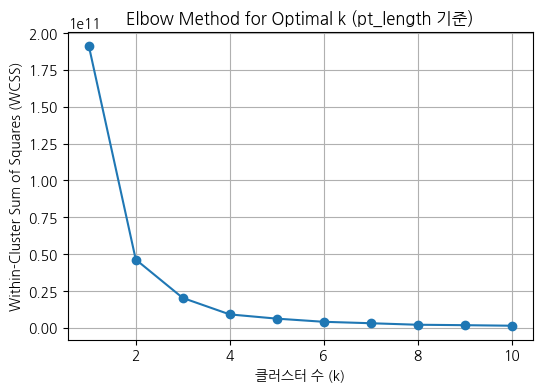

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1D 수치형 데이터를 2D로 변환 (sklearn용)
X = df_raw[['pt_length']].values

# WCSS 저장 리스트
wcss = []

# 클러스터 수 1~10까지 시도
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_: WCSS

# 결과 시각화
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k (pt_length 기준)')
plt.xlabel('클러스터 수 (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [38]:
optimal_k = 2  # elbow plot 보고 선택
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df_raw['pt_length_cluster'] = kmeans.fit_predict(X)


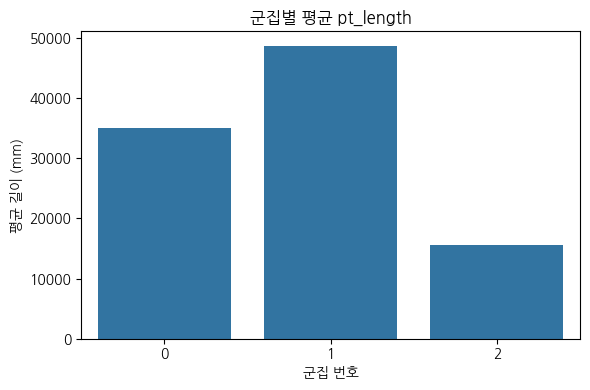

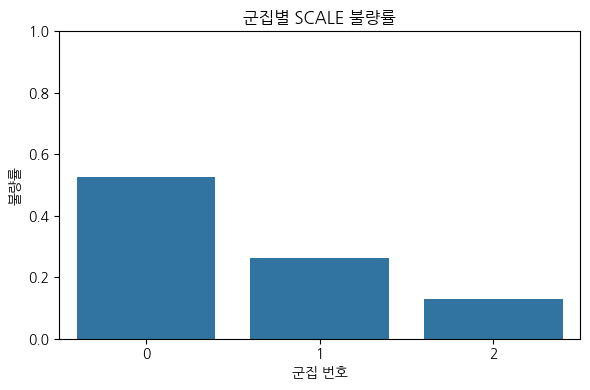

   pt_length_cluster  avg_length  defect_rate  count
0                  0    35021.67         0.53    300
1                  1    48698.06         0.26    463
2                  2    15524.68         0.13    231


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# # scale 이진화 (불량=1, 양품=0)
# df_raw['scale'] = df_raw['scale'].map({'양품': 0, '불량': 1})


# KMeans 클러스터링 (pt_length 기준)
k = 3  # 클러스터 수
kmeans = KMeans(n_clusters=k, random_state=0)
df_raw['pt_length_cluster'] = kmeans.fit_predict(df_raw[['pt_length']])

# 군집별 평균 길이 및 불량률 집계
summary = df_raw.groupby('pt_length_cluster').agg(
    avg_length=('pt_length', 'mean'),
    defect_rate=('scale', 'mean'),
    count=('scale', 'count')
).reset_index()

# 그래프: 군집별 평균 길이
plt.figure(figsize=(6, 4))
sns.barplot(x='pt_length_cluster', y='avg_length', data=summary)
plt.title('군집별 평균 pt_length')
plt.xlabel('군집 번호')
plt.ylabel('평균 길이 (mm)')
plt.tight_layout()
plt.show()

# 그래프: 군집별 불량률
plt.figure(figsize=(6, 4))
sns.barplot(x='pt_length_cluster', y='defect_rate', data=summary)
plt.title('군집별 SCALE 불량률')
plt.xlabel('군집 번호')
plt.ylabel('불량률')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 결과 확인용 요약 테이블
print(summary.round(2))


In [40]:
df_raw

,plate_no,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,is_high_strength,is_ship_steel,heat_treatment_type,spec_grade,heat_temp_high,soak_temp_high,both_temp_high,descaling_parity,rolling_temp_1000,pt_length_cluster
0,PLT_1001,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,False,True,TM,EH32,False,False,False,even,low,2
1,PLT_1002,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,False,True,TM,EH32,False,False,False,even,low,2
2,PLT_1003,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,False,False,TM,UNKNOWN,False,False,False,even,low,2
3,PLT_1004,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,False,False,TM,UNKNOWN,True,False,False,even,low,2
4,PLT_1005,0,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,...,True,True,TM,EH36,False,False,False,even,low,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,0,BV-A,프랑스,C,19,3400,41500,적용,1호기,...,False,True,None,UNKNOWN,False,True,False,even,low,0
996,PLT_1997,0,LR-A,영국,C,19,3400,41500,적용,1호기,...,False,True,None,UNKNOWN,False,True,False,even,low,0
997,PLT_1998,0,AB/AH32,미국,C,17,3400,43700,적용,2호기,...,False,True,None,AH32,True,True,True,even,low,1
998,PLT_1999,0,NV-A32,영국,C,17,3400,43700,적용,2호기,...,False,False,None,UNKNOWN,True,True,True,even,low,1


### 2-3. 예열시간 파생변수 생성

In [41]:
# 예열시간 = 토탈 -(소크 + 히트)

In [42]:
df_raw.columns

Index(['plate_no', 'scale', 'spec_long', 'spec_country', 'steel_kind',
       'pt_thick', 'pt_width', 'pt_length', 'hsb', 'fur_no', 'fur_input_row',
       'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp', 'fur_soak_time',
       'fur_total_time', 'rolling_method', 'rolling_temp', 'descaling_count',
       'work_group', 'day', 'hour', 'minute', 'weekday_number',
       'is_high_strength', 'is_ship_steel', 'heat_treatment_type',
       'spec_grade', 'heat_temp_high', 'soak_temp_high', 'both_temp_high',
       'descaling_parity', 'rolling_temp_1000', 'pt_length_cluster'],
      dtype='object')

In [43]:
df_raw['preheat_time']=df_raw['fur_total_time']-(df_raw['fur_soak_time']+df_raw['fur_heat_time'])

In [44]:
pd.set_option('display.max_columns', None)

In [45]:
df_raw

,plate_no,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,day,hour,minute,weekday_number,is_high_strength,is_ship_steel,heat_treatment_type,spec_grade,heat_temp_high,soak_temp_high,both_temp_high,descaling_parity,rolling_temp_1000,pt_length_cluster,preheat_time
0,PLT_1001,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조,3,7,7,1,False,True,TM,EH32,False,False,False,even,low,2,84
1,PLT_1002,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조,3,7,21,1,False,True,TM,EH32,False,False,False,even,low,2,63
2,PLT_1003,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조,3,7,31,1,False,False,TM,UNKNOWN,False,False,False,even,low,2,87
3,PLT_1004,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조,3,7,41,1,False,False,TM,UNKNOWN,True,False,False,even,low,2,73
4,PLT_1005,0,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조,3,7,52,1,True,True,TM,EH36,False,False,False,even,low,2,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,0,BV-A,프랑스,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,CR(제어압연),948,10,4조,10,5,32,1,False,True,None,UNKNOWN,False,True,False,even,low,0,62
996,PLT_1997,0,LR-A,영국,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,CR(제어압연),948,10,4조,10,5,39,1,False,True,None,UNKNOWN,False,True,False,even,low,0,68
997,PLT_1998,0,AB/AH32,미국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,CR(제어압연),948,10,4조,10,5,52,1,False,True,None,AH32,True,True,True,even,low,1,85
998,PLT_1999,0,NV-A32,영국,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,CR(제어압연),948,10,4조,10,6,1,1,False,False,None,UNKNOWN,True,True,True,even,low,1,62


### 2-4 HSB 적용(1), 미적용(0) 더미

In [46]:
# df_raw['hsb'].unique()

In [47]:
# df_raw['hsb'] = df_raw['hsb'].map({'적용': 1, '미적용': 0})

In [48]:
# df_raw['hsb'].unique()

In [49]:
df_raw['is_high_strength'].value_counts()

is_high_strength
False    775
True     219
Name: count, dtype: int64

In [50]:
df_raw['spec_country'].unique()

array(['미국', '영국', '프랑스', '공통', '독일', '한국', '일본'], dtype=object)

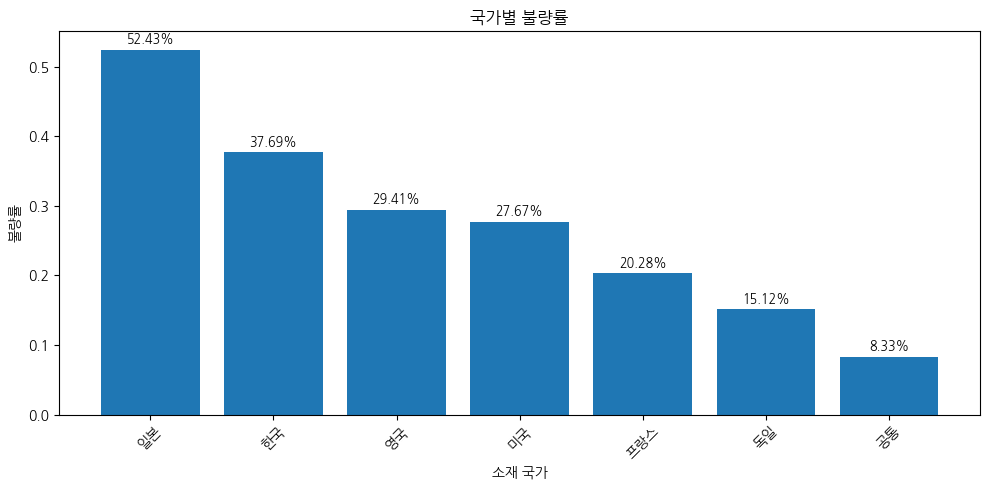

In [51]:
import pandas as pd
import matplotlib.pyplot as plt


# '불량' → 1, '양품' → 0 으로 변환


# 국가별 불량률 계산
country_defect_rate = df_raw.groupby('spec_country')['scale'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 5))
bars = plt.bar(country_defect_rate.index, country_defect_rate.values)

# 막대 위에 숫자 표시 (퍼센트)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.2%}',
             ha='center', va='bottom', fontsize=9)

plt.title('국가별 불량률')
plt.xlabel('소재 국가')
plt.ylabel('불량률')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


spec_country 드랍 결정!!!!!!!!!!! -> 다른 변수들이 충분히 설명 가능할듯

### 2-5. 중복 변수 1차 드랍

In [52]:
df_raw.drop(['plate_no', 'spec_long','spec_country','spec_grade'], axis=1, inplace=True)

In [53]:
df_raw.drop(['descaling_count'],axis=1,inplace=True)

In [54]:
df_raw

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,work_group,day,hour,minute,weekday_number,is_high_strength,is_ship_steel,heat_treatment_type,heat_temp_high,soak_temp_high,both_temp_high,descaling_parity,rolling_temp_1000,pt_length_cluster,preheat_time
0,0,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,TMCP(온도제어),934,1조,3,7,7,1,False,True,TM,False,False,False,even,low,2,84
1,0,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,TMCP(온도제어),937,1조,3,7,21,1,False,True,TM,False,False,False,even,low,2,63
2,0,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,TMCP(온도제어),889,1조,3,7,31,1,False,False,TM,False,False,False,even,low,2,87
3,0,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,TMCP(온도제어),885,1조,3,7,41,1,False,False,TM,True,False,False,even,low,2,73
4,0,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,TMCP(온도제어),873,1조,3,7,52,1,True,True,TM,False,False,False,even,low,2,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,203,CR(제어압연),948,4조,10,5,32,1,False,True,None,False,True,False,even,low,0,62
996,0,C,19,3400,41500,적용,1호기,2열,1142,55,1151,86,209,CR(제어압연),948,4조,10,5,39,1,False,True,None,False,True,False,even,low,0,68
997,0,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,227,CR(제어압연),948,4조,10,5,52,1,False,True,None,True,True,True,even,low,1,85
998,0,C,17,3400,43700,적용,2호기,2열,1169,65,1163,77,204,CR(제어압연),948,4조,10,6,1,1,False,False,None,True,True,True,even,low,1,62


In [55]:
df_raw.columns

Index(['scale', 'steel_kind', 'pt_thick', 'pt_width', 'pt_length', 'hsb',
       'fur_no', 'fur_input_row', 'fur_heat_temp', 'fur_heat_time',
       'fur_soak_temp', 'fur_soak_time', 'fur_total_time', 'rolling_method',
       'rolling_temp', 'work_group', 'day', 'hour', 'minute', 'weekday_number',
       'is_high_strength', 'is_ship_steel', 'heat_treatment_type',
       'heat_temp_high', 'soak_temp_high', 'both_temp_high',
       'descaling_parity', 'rolling_temp_1000', 'pt_length_cluster',
       'preheat_time'],
      dtype='object')

## 3. 검정

### 3-0. 변수 분리

In [56]:
# 목표변수 제외
X = df_raw.drop(columns=['scale'])

# 변수 타입별 분리
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

print("연속형 변수:", numerical_cols)
print("범주형 변수:", categorical_cols)

연속형 변수: ['pt_thick', 'pt_width', 'pt_length', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp', 'fur_soak_time', 'fur_total_time', 'rolling_temp', 'preheat_time']
범주형 변수: ['steel_kind', 'hsb', 'fur_no', 'fur_input_row', 'rolling_method', 'work_group', 'is_high_strength', 'is_ship_steel', 'heat_treatment_type', 'heat_temp_high', 'soak_temp_high', 'both_temp_high', 'descaling_parity', 'rolling_temp_1000']


In [57]:
# 연속형 변수와 목표변수 간 상관계수
corr_with_target = df_raw[numerical_cols + ['scale']].corr()['scale'].drop('scale').sort_values(ascending=False)
print(corr_with_target)

rolling_temp      0.511333
fur_soak_temp     0.326957
fur_heat_temp     0.220581
pt_length         0.048928
preheat_time      0.037959
fur_heat_time    -0.036178
pt_thick         -0.094441
fur_total_time   -0.129333
pt_width         -0.193817
fur_soak_time    -0.220873
Name: scale, dtype: float64


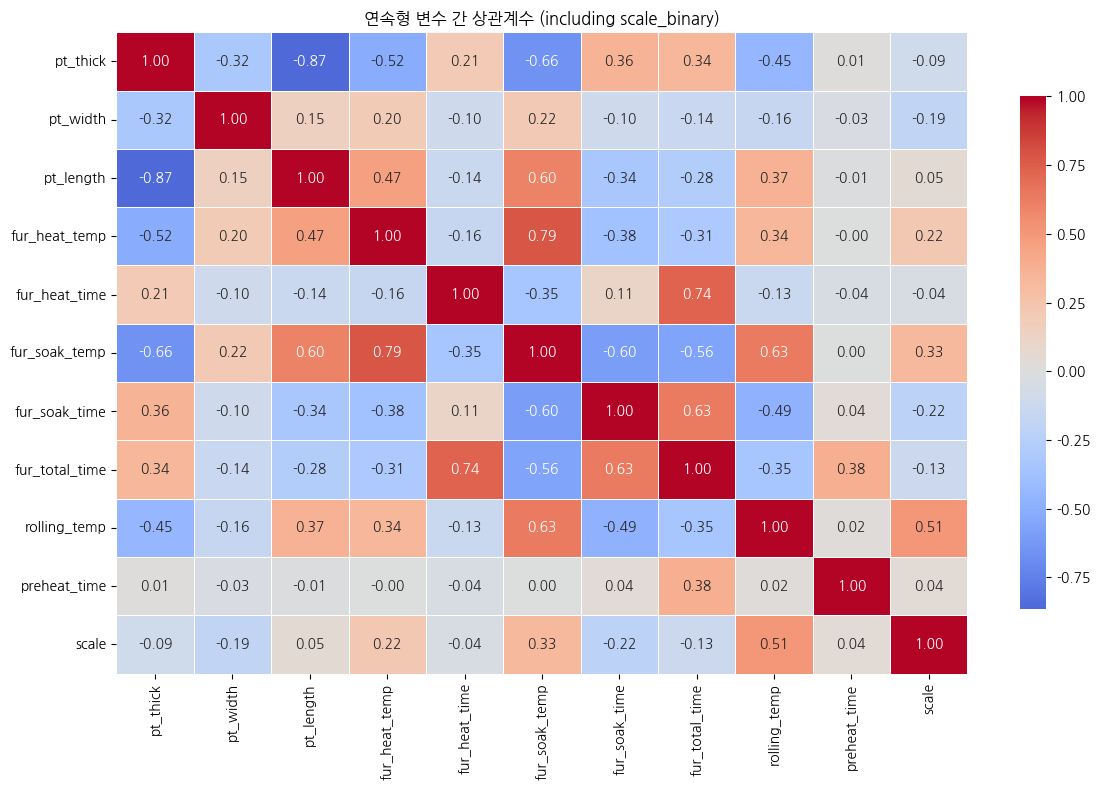

In [58]:
# 상관계수 계산 (연속형 변수 + scale_binary 포함)
corr_matrix = df_raw[numerical_cols + ['scale']].corr()

# 시각화: 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title("연속형 변수 간 상관계수 (including scale_binary)")
plt.tight_layout()
plt.show()


In [59]:
# VIF 계산용 데이터
X_num = df_raw[numerical_cols].dropna()  # 결측치 제거
X_num_const = add_constant(X_num)

vif = pd.DataFrame()
vif["변수명"] = X_num.columns
vif["VIF"] = [variance_inflation_factor(X_num_const.values, i + 1) for i in range(len(X_num.columns))]

print(vif.sort_values(by='VIF', ascending=False))

              변수명       VIF
4   fur_heat_time       inf
6   fur_soak_time       inf
7  fur_total_time       inf
9    preheat_time       inf
5   fur_soak_temp  7.475719
0        pt_thick  5.977490
2       pt_length  4.813312
3   fur_heat_temp  3.267657
8    rolling_temp  2.552118
1        pt_width  1.564876


### 3-1. 범주형 목표변수와 연속형 설명변수의 검정(t검정)

### 3-2. 범주형 목표변수와 범주형 설명변수의 검정(카이 검정)

In [60]:
from scipy.stats import chi2_contingency
import pandas as pd

# 범주형 변수 리스트
categorical_var = [
    'steel_kind', 'fur_no', 'fur_input_row', 'rolling_method', 'work_group',
    'is_high_strength', 'is_ship_steel', 'heat_treatment_type',
    'heat_temp_high', 'soak_temp_high', 'both_temp_high',
    'descaling_parity', 'rolling_temp_1000', 'hsb'
]

# 결과 저장용 리스트
chi2_results = []

# 각 변수에 대해 카이제곱 검정 수행
for var in categorical_var:
    try:
        contingency_table = pd.crosstab(df_raw[var], df_raw['scale'])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        chi2_results.append({
            '변수': var,
            '카이제곱 통계량': round(chi2, 4),
            'p-value': p_value,
            '유의미 여부(p<0.05)': '✅' if p_value < 0.05 else '❌'
        })
    except Exception as e:
        chi2_results.append({
            '변수': var,
            '카이제곱 통계량': 'Error',
            'p-value': 'Error',
            '유의미 여부(p<0.05)': f'에러: {str(e)}'
        })

# 결과를 표 형태로 정리
chi2_df = pd.DataFrame(chi2_results)
chi2_df = chi2_df.sort_values(by='p-value', ascending=True, key=lambda x: x if x.dtype != 'O' else pd.Series([1e9]*len(x)))

# 예쁘게 출력
from IPython.display import display
display(chi2_df)


,변수,카이제곱 통계량,p-value,유의미 여부(p<0.05)
12,rolling_temp_1000,493.2474,2.800438e-109,✅
11,descaling_parity,130.0387,4.018711e-30,✅
13,hsb,105.5105,9.439705e-25,✅
9,soak_temp_high,101.3963,7.530423e-24,✅
10,both_temp_high,92.0397,8.495499e-22,✅
0,steel_kind,76.2577,2.489547e-18,✅
8,heat_temp_high,46.3607,9.836905e-12,✅
3,rolling_method,44.8800,2.094833e-11,✅
7,heat_treatment_type,44.1891,2.537821e-10,✅
6,is_ship_steel,24.8885,6.074214e-07,✅


3-3. 범주형 목표변수와 연속형 설명변수의 검정(아노바 검정)

In [61]:
from scipy.stats import f_oneway
import pandas as pd

# 연속형 변수 리스트
numerical_cols = [
    'pt_thick', 'pt_width', 'pt_length',
    'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp', 'fur_soak_time',
    'fur_total_time', 'rolling_temp', 'preheat_time'
]

# 결과 저장 리스트
anova_results = []

# 그룹 나누기: 양품(0), 불량(1)
for col in numerical_cols:
    try:
        group0 = df_raw[df_raw['scale'] == 0][col].dropna()
        group1 = df_raw[df_raw['scale'] == 1][col].dropna()
        f_stat, p = f_oneway(group0, group1)
        anova_results.append({
            '변수': col,
            'F-통계량': round(f_stat, 4),
            'p-value': p,
            '유의미 여부(p<0.05)': '✅' if p < 0.05 else '❌'
        })
    except Exception as e:
        anova_results.append({
            '변수': col,
            'F-통계량': 'Error',
            'p-value': 'Error',
            '유의미 여부(p<0.05)': f'에러: {str(e)}'
        })

# 결과 프레임 생성
anova_df = pd.DataFrame(anova_results)

# 결과 출력
anova_df.sort_values('p-value', ascending=True)


,변수,F-통계량,p-value,유의미 여부(p<0.05)
8,rolling_temp,351.1939,2.550535e-67,✅
5,fur_soak_temp,118.7386,3.402662e-26,✅
6,fur_soak_time,50.8768,1.894621e-12,✅
3,fur_heat_temp,50.7352,2.029132e-12,✅
1,pt_width,38.7191,7.207975e-10,✅
7,fur_total_time,16.8754,4.320700e-05,✅
0,pt_thick,8.9274,2.878359e-03,✅
2,pt_length,2.3805,1.231808e-01,❌
9,preheat_time,1.4314,2.318205e-01,❌
4,fur_heat_time,1.3001,2.544689e-01,❌


In [62]:
#드랍

In [63]:
## 카이제곱 검정 유의하지 않은 것들 제거 

In [64]:
df_raw.drop(['fur_no','fur_input_row'],axis=1,inplace=True)

In [65]:
## ANNOVA 검정 유의하지 않은 것들 제거 

In [66]:
df_raw.drop(['pt_length','preheat_time', 'fur_heat_time'],axis=1,inplace=True)

In [67]:
df_raw.drop(['fur_total_time','pt_thick'],axis=1,inplace=True)

In [68]:
df_raw.drop(['fur_heat_temp', 'fur_soak_temp'],axis=1,inplace=True)

In [69]:
df_drop = df_raw

In [70]:
df_drop

,scale,steel_kind,pt_width,hsb,fur_soak_time,rolling_method,rolling_temp,work_group,day,hour,minute,weekday_number,is_high_strength,is_ship_steel,heat_treatment_type,heat_temp_high,soak_temp_high,both_temp_high,descaling_parity,rolling_temp_1000,pt_length_cluster
0,0,T,3700,적용,59,TMCP(온도제어),934,1조,3,7,7,1,False,True,TM,False,False,False,even,low,2
1,0,T,3700,적용,53,TMCP(온도제어),937,1조,3,7,21,1,False,True,TM,False,False,False,even,low,2
2,0,T,3600,적용,55,TMCP(온도제어),889,1조,3,7,31,1,False,False,TM,False,False,False,even,low,2
3,0,T,3600,적용,68,TMCP(온도제어),885,1조,3,7,41,1,False,False,TM,True,False,False,even,low,2
4,0,T,3100,적용,48,TMCP(온도제어),873,1조,3,7,52,1,True,True,TM,False,False,False,even,low,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,C,3400,적용,86,CR(제어압연),948,4조,10,5,32,1,False,True,None,False,True,False,even,low,0
996,0,C,3400,적용,86,CR(제어압연),948,4조,10,5,39,1,False,True,None,False,True,False,even,low,0
997,0,C,3400,적용,77,CR(제어압연),948,4조,10,5,52,1,False,True,None,True,True,True,even,low,1
998,0,C,3400,적용,77,CR(제어압연),948,4조,10,6,1,1,False,False,None,True,True,True,even,low,1


In [71]:
df_drop[df_drop['heat_treatment_type']=='None']

,scale,steel_kind,pt_width,hsb,fur_soak_time,rolling_method,rolling_temp,work_group,day,hour,minute,weekday_number,is_high_strength,is_ship_steel,heat_treatment_type,heat_temp_high,soak_temp_high,both_temp_high,descaling_parity,rolling_temp_1000,pt_length_cluster
10,0,T,3100,적용,73,CR(제어압연),881,1조,3,8,54,1,False,False,None,False,False,False,even,low,2
12,0,T,3100,적용,58,CR(제어압연),869,1조,3,9,17,1,False,False,None,False,False,False,even,low,2
14,0,T,3100,적용,62,CR(제어압연),820,1조,3,9,33,1,False,False,None,False,False,False,even,low,2
15,1,T,3100,적용,68,CR(제어압연),1057,1조,3,9,42,1,False,False,None,False,False,False,even,high,2
17,0,T,1900,적용,65,CR(제어압연),926,1조,3,10,0,1,False,False,None,False,False,False,even,low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,C,3400,적용,86,CR(제어압연),948,4조,10,5,32,1,False,True,None,False,True,False,even,low,0
996,0,C,3400,적용,86,CR(제어압연),948,4조,10,5,39,1,False,True,None,False,True,False,even,low,0
997,0,C,3400,적용,77,CR(제어압연),948,4조,10,5,52,1,False,True,None,True,True,True,even,low,1
998,0,C,3400,적용,77,CR(제어압연),948,4조,10,6,1,1,False,False,None,True,True,True,even,low,1


In [72]:
df_drop.drop('heat_treatment_type',axis=1,inplace=True)

In [73]:
df_drop

,scale,steel_kind,pt_width,hsb,fur_soak_time,rolling_method,rolling_temp,work_group,day,hour,minute,weekday_number,is_high_strength,is_ship_steel,heat_temp_high,soak_temp_high,both_temp_high,descaling_parity,rolling_temp_1000,pt_length_cluster
0,0,T,3700,적용,59,TMCP(온도제어),934,1조,3,7,7,1,False,True,False,False,False,even,low,2
1,0,T,3700,적용,53,TMCP(온도제어),937,1조,3,7,21,1,False,True,False,False,False,even,low,2
2,0,T,3600,적용,55,TMCP(온도제어),889,1조,3,7,31,1,False,False,False,False,False,even,low,2
3,0,T,3600,적용,68,TMCP(온도제어),885,1조,3,7,41,1,False,False,True,False,False,even,low,2
4,0,T,3100,적용,48,TMCP(온도제어),873,1조,3,7,52,1,True,True,False,False,False,even,low,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,C,3400,적용,86,CR(제어압연),948,4조,10,5,32,1,False,True,False,True,False,even,low,0
996,0,C,3400,적용,86,CR(제어압연),948,4조,10,5,39,1,False,True,False,True,False,even,low,0
997,0,C,3400,적용,77,CR(제어압연),948,4조,10,5,52,1,False,True,True,True,True,even,low,1
998,0,C,3400,적용,77,CR(제어압연),948,4조,10,6,1,1,False,False,True,True,True,even,low,1


In [74]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   scale              994 non-null    int32 
 1   steel_kind         994 non-null    object
 2   pt_width           994 non-null    int64 
 3   hsb                994 non-null    object
 4   fur_soak_time      994 non-null    int64 
 5   rolling_method     994 non-null    object
 6   rolling_temp       994 non-null    int64 
 7   work_group         994 non-null    object
 8   day                994 non-null    int32 
 9   hour               994 non-null    int32 
 10  minute             994 non-null    int32 
 11  weekday_number     994 non-null    int32 
 12  is_high_strength   994 non-null    bool  
 13  is_ship_steel      994 non-null    bool  
 14  heat_temp_high     994 non-null    bool  
 15  soak_temp_high     994 non-null    bool  
 16  both_temp_high     994 non-null    bool  
 17  de

In [75]:
#산점도

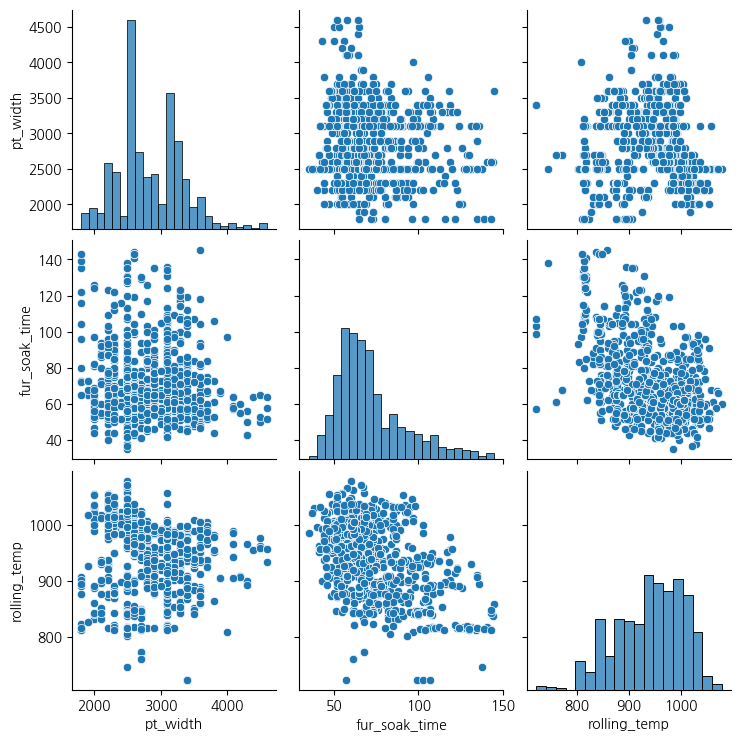

In [76]:
variables = [ 'pt_width', 'fur_soak_time',
     'rolling_temp']

sns.pairplot(df_drop[variables])
plt.show()

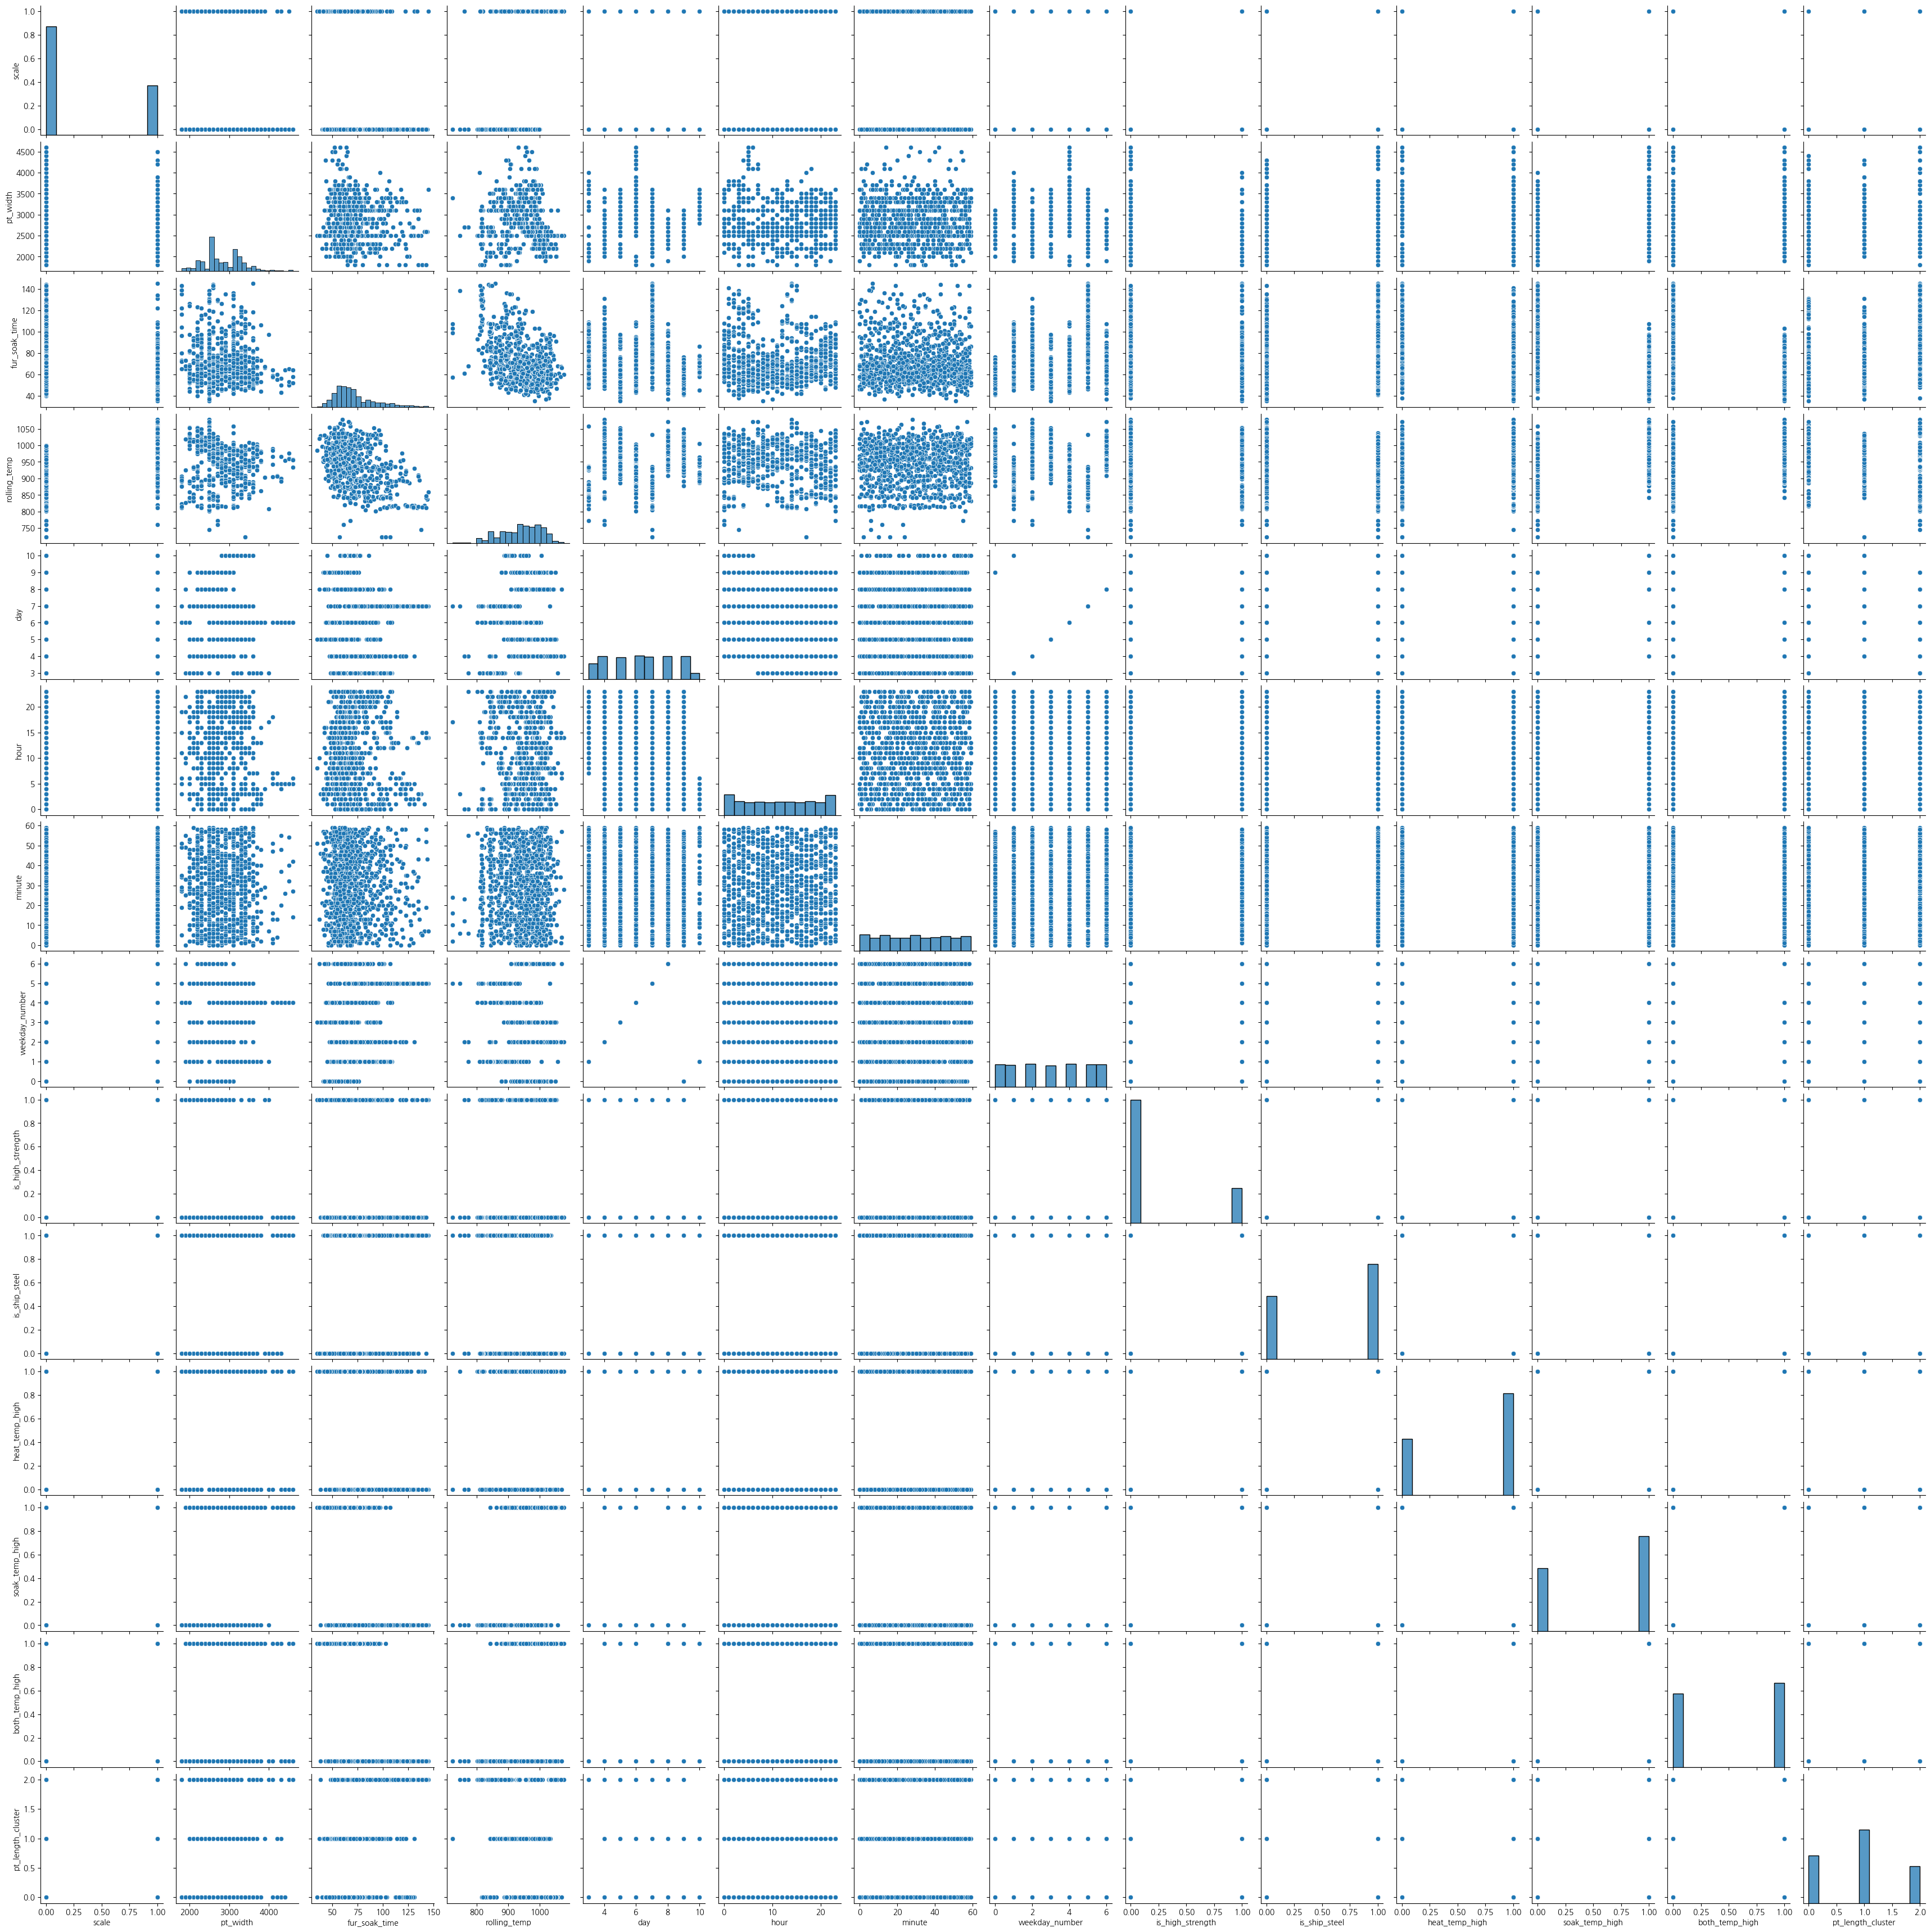

In [77]:
sns.pairplot(df_drop)
plt.show()

In [78]:
categorical_cols = [
    'steel_kind',  'rolling_method', 'work_group',
    'is_high_strength', 'is_ship_steel', 
    'heat_temp_high', 'soak_temp_high', 'both_temp_high',
    'descaling_parity', 'rolling_temp_1000', 'hsb'
]  # 등등

# 더미화 + 0/1 변환
df_dummy = pd.get_dummies(df_drop, columns=categorical_cols, drop_first=True)
df_dummy = df_dummy.astype(int)

In [79]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   scale                      994 non-null    int32
 1   pt_width                   994 non-null    int32
 2   fur_soak_time              994 non-null    int32
 3   rolling_temp               994 non-null    int32
 4   day                        994 non-null    int32
 5   hour                       994 non-null    int32
 6   minute                     994 non-null    int32
 7   weekday_number             994 non-null    int32
 8   pt_length_cluster          994 non-null    int32
 9   steel_kind_T               994 non-null    int32
 10  rolling_method_TMCP(온도제어)  994 non-null    int32
 11  work_group_2조              994 non-null    int32
 12  work_group_3조              994 non-null    int32
 13  work_group_4조              994 non-null    int32
 14  is_high_strength_True      994 

In [80]:
df_dummy.to_csv('scale_df_dummy.csv')

In [81]:
from sklearn.model_selection import train_test_split

# 입력 (X), 타겟 (y) 분리
X = df_dummy.drop("scale", axis=1)
y = df_dummy["scale"]

# 고정된 분할을 위해 random_state 설정
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1234, stratify=y
)


In [82]:
X_train.to_csv('scale_train_x.csv')
y_train.to_csv('scale_train_y.csv')
X_test.to_csv('scale_test_x.csv')
y_test.to_csv('scale_test_y.csv')

In [83]:
df

NameError: name 'df' is not defined